In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.edge.service import Service
import pandas as pd
import os
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import csv, sqlite3

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [3]:
df = pd.read_csv('realtor-data.zip.csv')

In [4]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [5]:
df.drop(columns=['prev_sold_date'], inplace=True)

In [6]:
df.isnull().sum()

brokered_by      4533
status              0
price            1541
bed            481317
bath           511771
acre_lot       325589
street          10866
city             1407
state               8
zip_code          299
house_size     568484
dtype: int64

In [7]:
df_cleaned = df.dropna()

In [8]:
len(df_cleaned)

1354105

In [9]:
df_cleaned['PriceSegment'] = pd.cut(df_cleaned['price'],bins = [0, 500000, 1000000, 2000000, 5000000, np.inf], 
                                 labels = ['Affordable', 'Mid-range', 'High-end', 'Luxury', 'Ultra-Luxury']
)


urban_area = ['New Jersey', 'California','Maryland']
pattern = '|'.join(urban_area)
df_urban = df_cleaned.loc[df_cleaned.city.str.contains(pattern)]
df_urban.reset_index(drop=True, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_11408\3764769826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['PriceSegment'] = pd.cut(df_cleaned['price'],bins = [0, 500000, 1000000, 2000000, 5000000, np.inf],


In [10]:
df_urban = df_urban[['city','state','house_size','bed','bath','price','PriceSegment']]
df_urban

,city,state,house_size,bed,bath,price,PriceSegment
0,Maryland,New York,1200.0,3.0,1.0,29000.0,Affordable
1,Maryland,New York,730.0,1.0,1.0,99000.0,Affordable
2,Maryland,New York,1500.0,3.0,1.0,79900.0,Affordable
3,Maryland,New York,1687.0,4.0,2.0,49900.0,Affordable
4,Maryland,New York,1300.0,3.0,2.0,119000.0,Affordable
...,...,...,...,...,...,...,...
584,California City,California,2012.0,3.0,2.0,345000.0,Affordable
585,California City,California,1344.0,3.0,2.0,245000.0,Affordable
586,California City,California,976.0,2.0,1.0,69500.0,Affordable
587,California City,California,2698.0,4.0,3.0,369999.0,Affordable


In [11]:
con = sqlite3.connect('UrbanHouse.db')
cur = con.cursor()

In [12]:
%load_ext sql 

In [13]:
%sql sqlite:///UrbanHouse.db

In [14]:
df_urban.to_sql('UrbanArea',con,if_exists = 'replace',index = False)

589

In [15]:
%%sql 
SELECT *
FROM UrbanArea
WHERE [price] >= 100000

 * sqlite:///UrbanHouse.db
Done.


city,state,house_size,bed,bath,price,PriceSegment
Maryland,New York,1300.0,3.0,2.0,119000.0,Affordable
Maryland,New York,2100.0,4.0,2.0,269000.0,Affordable
Maryland,New York,2334.0,3.0,2.0,149000.0,Affordable
Maryland,New York,864.0,1.0,1.0,213000.0,Affordable
Maryland,New York,1488.0,3.0,2.0,234900.0,Affordable
Maryland,New York,660.0,2.0,1.0,267000.0,Affordable
Maryland,New York,2334.0,3.0,2.0,149000.0,Affordable
Maryland,New York,2824.0,4.0,3.0,599900.0,Mid-range
Maryland,New York,1830.0,3.0,3.0,168500.0,Affordable
California,Pennsylvania,1710.0,6.0,2.0,199900.0,Affordable


In [16]:
con.close()

# Phân tích giá nhà tại các khu vực ngoại ô

In [17]:
stats = df_urban.describe()

In [18]:
print('Thống kê mô tả tỏng quá bất động sản')
stats

Thống kê mô tả tỏng quá bất động sản


,house_size,bed,bath,price
count,589.000000,589.000000,589.000000,5.890000e+02
mean,1820.952462,3.302207,2.417657,2.890342e+05
std,960.664225,1.051568,1.014568,1.430083e+05
min,576.000000,1.000000,1.000000,2.900000e+04
25%,1277.000000,3.000000,2.000000,2.090000e+05
50%,1660.000000,3.000000,2.000000,2.690000e+05
75%,2078.000000,4.000000,3.000000,3.400000e+05
max,10709.000000,13.000000,9.000000,1.500000e+06


In [19]:
# Độ biến thiên giá theo khu vực
price_variance_by_location = df_urban.groupby('state')['price'].var()
price_variance_by_location

state
California      1.082715e+10
Kentucky        6.595487e+09
Maryland        1.895147e+10
Missouri        2.361291e+10
New York        1.420436e+10
Pennsylvania    6.807005e+09
Name: price, dtype: float64

In [20]:
# Số lượng bất động sản theo khu vực
count_the_city = df['city'].value_counts()
count_the_city

city
Houston                        23862
Chicago                        18238
New York City                  12634
Jacksonville                   11743
Philadelphia                   10449
                               ...  
Angel Ifre                         1
Colfax County Moreno Valley        1
Little Sioux                       1
Trementina                         1
Kahlotus                           1
Name: count, Length: 20098, dtype: int64

In [21]:
# Hệ số biến thiên giá (coeefficient of variation) 
cv = df['price'].std() / df['price'].mean()
cv

4.080334803335655

In [22]:
# Độ phân tán giá
price_range = df_urban['price'].max() - df_urban['price'].min()

price_range

1471000.0

In [23]:
Q1 = df_urban['price'].quantile(0.25)
Q3 = df_urban['price'].quantile(0.75)

IQR = Q3 - Q1 

outliers = df_urban[(df_urban['price'] < (Q1 - 1.5 * IQR)) | (df_urban['price'] > (Q3 + 1.5 * IQR))]

outliers

,city,state,house_size,bed,bath,price,PriceSegment
12,Maryland,New York,2824.0,4.0,3.0,599900.0,Mid-range
28,California,Maryland,5760.0,8.0,7.0,935000.0,Mid-range
35,California,Maryland,3170.0,5.0,3.0,619900.0,Mid-range
55,California,Maryland,740.0,2.0,1.0,885000.0,Mid-range
58,California,Maryland,3068.0,5.0,4.0,575000.0,Mid-range
65,California,Maryland,4698.0,6.0,4.0,600000.0,Mid-range
69,California,Maryland,10709.0,6.0,6.0,899000.0,Mid-range
73,Maryland Heights,Missouri,6966.0,4.0,3.0,1500000.0,High-end
76,Maryland Heights,Missouri,2400.0,3.0,3.0,650000.0,Mid-range
138,California,Missouri,10000.0,5.0,4.0,1490000.0,High-end


In [24]:
# Độ lệch trung bình tuyệt đối (mean absolute deviation)
price_data = df_urban['price']
mean_price = price_data.mean()

mad = (price_data - mean_price).abs().mean()

mad


94039.1191135734

In [25]:
frequency = df_urban['PriceSegment'].value_counts()
frequency

PriceSegment
Affordable      556
Mid-range        31
High-end          2
Luxury            0
Ultra-Luxury      0
Name: count, dtype: int64

In [26]:
# Hệ số tương quan giữa gía và diện tích
corr_price_area = df_urban['price'].corr(df_urban['house_size'])
corr_price_area

0.7237257690364708

In [27]:
# Hệ số tương quan giữa giá và phòng ngủ
corr_price_bed = df_urban['price'].corr(df_urban['bed'])
corr_price_bed

0.47595030503589536

In [28]:
outliers_upper = df_urban[df_urban['price'] > (Q3 + 1.5 * IQR)]
outliers_lower = df_urban[df_urban['price'] < (Q1 - 1.5 * IQR)]
print(f'Outliers upper : {outliers_upper}')
print(f'Outliers lower : {outliers_lower}')

Outliers upper :                        city       state  house_size   bed  bath      price  \
12                 Maryland    New York      2824.0   4.0   3.0   599900.0   
28               California    Maryland      5760.0   8.0   7.0   935000.0   
35               California    Maryland      3170.0   5.0   3.0   619900.0   
55               California    Maryland       740.0   2.0   1.0   885000.0   
58               California    Maryland      3068.0   5.0   4.0   575000.0   
65               California    Maryland      4698.0   6.0   4.0   600000.0   
69               California    Maryland     10709.0   6.0   6.0   899000.0   
73         Maryland Heights    Missouri      6966.0   4.0   3.0  1500000.0   
76         Maryland Heights    Missouri      2400.0   3.0   3.0   650000.0   
138              California    Missouri     10000.0   5.0   4.0  1490000.0   
166         California City  California      3679.0   4.0   2.0   720000.0   
168         California City  California      45

In [29]:
price_quantiles = df_urban['price'].quantile([0.25,0.5,0.7,1.0])
price_quantiles

0.25     209000.0
0.50     269000.0
0.70     325000.0
1.00    1500000.0
Name: price, dtype: float64

Text(0, 0.5, 'Giá BĐS trung bình (USD')

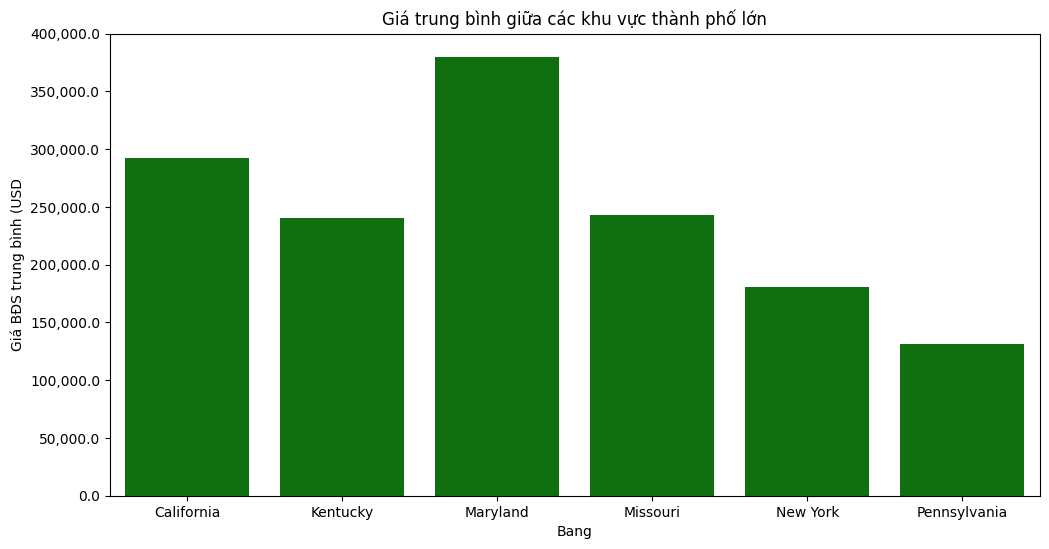

In [30]:
average_state = df_urban.groupby('state')['price'].mean()

plt.figure(figsize =(12,6))
sns.barplot(x =average_state.index, y =average_state.values, color = 'green')

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(1):,.1f}' for tick in yticks])

plt.title('Giá trung bình giữa các khu vực thành phố lớn')
plt.xlabel('Bang')
plt.ylabel('Giá BĐS trung bình (USD')

In [32]:
x = df_urban[['house_size','bed', 'bath' ]]
y = df_urban[['price']]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
model =LinearRegression()
model.fit(x_train, y_train)
price_prediction = model.predict(x_test)

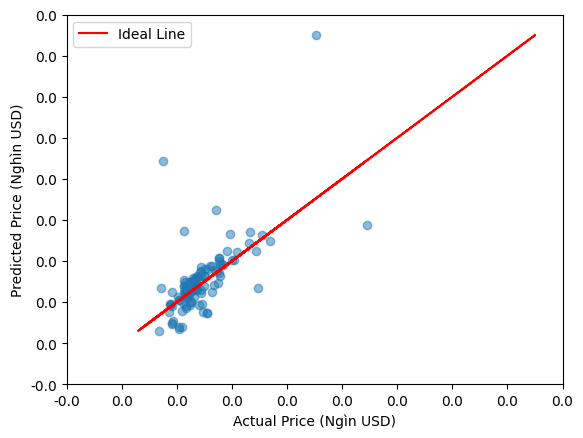

In [33]:
plt.scatter(x = price_prediction, y = y_test.values, alpha = 0.5)
plt.plot(y_test.values, y_test.values, color = 'red',label = 'Ideal Line' )

plt.ylabel('Predicted Price (Nghìn USD)')
plt.xlabel('Actual Price (Ngìn USD)')
plt.legend()

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick)/(10*(10**9)):,.1f}' for tick in xticks])

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10*(10**9)):,.1f}' for tick in yticks]);

In [ ]:
x_test = [['price']]